# **Q3: Which non-fossil fuel energy technology will have the best price in the future?**

To be able to predict prices you'll probably need to use linear regression over the various non-fossil fuel options.

## **Data preperation**

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# %load_ext google.colab.data_table

### Function used

This function is designed to predict the future prices of non-fossil fuel energy technologies using different regression techniques (linear regression, polynomial regression (with degrees 2 and 3), and logarithmic regression).

Here's a step-by-step explanation:

1.   Input Parameters:

regression_model: This is a pre-initialized instance of a regression model (linear, polynomial, or logarithmic) that will be used for predictions.
regression_type: A string indicating the type of regression technique to be applied.

2.   Data Preparation:

Historical data, represented by X and y, is extracted from the df_nonfossil_energy_prizes_world dataframe. The variable X corresponds to years (as independent variables), and to ensure compatibility with certain regression techniques, it's reshaped into a suitable format. The variable y contains energy prices (dependent variable) for various non-fossil fuel technologies.

3.   Prediction for Future Years (2022-2030):

The range of future years (2022 to 2030) is generated using the np.arange function and reshaped to the required format. The variable future_prices is initialized with a value of None, serving as a placeholder to store the predicted energy prices for the future years based on the chosen regression technique. The actual value of future_prices will be determined within the conditional statements based on the selected regression type.

4.   Regression Techniques:

Depending on the regression_type, different regression techniques are applied. Four types are supported: linear, polynomial2, polynomial3, and logarithmic.

5.   Predictions and Transformation:

>*   For linear regression, the model is trained on historical data (X and y), and predictions are made for future years.
>*   For polynomial regression (degree 2 or 3), the model is trained using higher-order polynomial terms, and predictions are made using transformed future years.
>*   For logarithmic regression, a linear regression model is trained on logarithm-transformed y, and predictions are made for future years. Then, these predictions are exponentiated.
>>(exponent is the reverse operation of the logarithm and ensures that the predicted prices are presented in their original unit, such as US dollars per kilowatt-hour).

6.   Handling Invalid Regression Type:

If the provided regression_type is not valid, an error message is displayed.

7.   Data Post-Processing:

If valid predictions were generated, the predicted prices are adjusted to be non-negative.
A new dataframe df_predicted_prices is created to hold the predicted prices with proper columns and indices.
The original dataframe df_nonfossil_energy_prizes_world is copied and concatenated with df_predicted_prices, then sorted by index.

8.   Plotting:

A line plot is created for the data in df_copy using df_copy.plot(kind='line').
X-axis range and display are set, labels and title are added, and grid lines are included.
Legend placement is adjusted to be outside the plot.

9.   Displaying the Plot:

The plot is displayed using plt.show().


The function efficiently handles different regression techniques, prepares and processes data, and provides visualizations to compare predicted energy prices for the future.


In [2]:
def predict_future_prices(regression_model, regression_type):
    # Define historical data
    X = df_nonfossil_energy_prizes_world.index.values.reshape(-1, 1)  # Independent variable (years)
    y = df_nonfossil_energy_prizes_world[['Bioenergy levelized cost of energy',
           'Geothermal levelized cost of energy',
           'Offshore wind levelized cost of energy',
           'Solar photovoltaic levelized cost of energy',
           'Concentrated solar power levelized cost of energy',
           'Hydropower levelized cost of energy',
           'Onshore wind levelized cost of energy']].values  # Dependent variable (price)

    # Predict the prices for future years (2022 to 2030)
    future_years = np.arange(2022, 2031).reshape(-1, 1)  # Future years as a 2D array

    # Initialize future_prices (if input regression_type is not a valid value)
    future_prices = None

    if regression_type == 'linear':
        # Make and train the regression model
        regression_model.fit(X, y)
        future_prices = regression_model.predict(future_years)

    elif regression_type == 'polynomial2':
        # Transform the independent variable to higher-order polynomial terms
        degree = 2  # Degree of the polynomial (can be adjusted)
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(X)

        # Make and train the polynomial regression model
        regression_model.fit(X_poly, y)

        # Predict the prices for future values
        future_values = poly_features.transform(future_years)
        future_prices = regression_model.predict(future_values)

    elif regression_type == 'polynomial3':
        # Transform the independent variable to third-order polynomial terms
        degree = 3  # Degree of the polynomial (can be adjusted)
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(X)

        # Make and train the polynomial regression model
        regression_model.fit(X_poly, y)

        # Predict the prices for future values
        future_values = poly_features.transform(future_years)
        future_prices = regression_model.predict(future_values)

    elif regression_type == 'logarithmic':
        # Transform the dependent variable to the logarithm of the price
        y_log = np.log(y)

        # Create and train the linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y_log)

        # Predict the prices for future values
        future_prices_log = regression_model.predict(future_years)
        future_prices = np.exp(future_prices_log)

    else:
        # Invalid regression type, display an error message
        print("Invalid regression type. Please check your input.")

    if future_prices is not None:

        # Check if the predicted prices are negative and adjust them to zero if necessary
        future_prices = np.maximum(future_prices, 0)

        # Create a new dataframe with the predicted prices for future years
        df_predicted_prices = pd.DataFrame(future_prices, columns=df_nonfossil_energy_prizes_world.columns, index=future_years.flatten())

        # Copy the original dataframe and append the predicted prices
        df_copy = df_nonfossil_energy_prizes_world.copy()
        df_copy = pd.concat([df_copy, df_predicted_prices])

        # Sort the dataframe by index
        df_copy.sort_index(inplace=True)

        # # Create the plot
        # ax = df_copy.plot(kind='line')

        # Create the plot
        df_copy.plot(kind='line')

        # Set the range of the x-axis
        start_year = 2011
        end_year = df_copy.index.max()
        plt.xlim(start_year, end_year)

        # Set the display of the x-axis to whole years
        plt.xticks(range(start_year, end_year+1, 2))

        # Set labels and title
        plt.xlabel('Year')
        plt.ylabel('US dollars per kilowatt-hour\n(adjusted for inflation)')
        plt.title(f"Non-fossil energy prices\nPredicted prices for 2022 to 2030\nRegression type {regression_type}")

        # Add legend outside the plot
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

        # Add grid lines
        plt.grid(True)

        # # Change linestyle for the years 2022 to 2030
        # lines = ax.get_lines()
        # for line in lines[-len(df_predicted_prices.columns):]:
        #     line.set_linestyle('--')

        # Display the plot
        plt.show()

### Data Acquisition

In [3]:
# Read the dataframe
df_nonfossil_energy_prizes= pd.read_csv("https://raw.githubusercontent.com/nicolette1/7_3_4_Final-assignment---CO2-emissions/main/levelized-cost-of-energy.csv")

### Data preprocessing

In [4]:
# Remove all rows with a missing value
# This results in a dataframe with only the values of the World
df_nonfossil_energy_prizes_world = df_nonfossil_energy_prizes.dropna()
# Remove the row where the value in the row 'Year' is 2010
# This results in the a dataframe with the years 2012 up to and including 2022
df_nonfossil_energy_prizes_world = df_nonfossil_energy_prizes_world[df_nonfossil_energy_prizes_world['Year'] != 2010]

In [5]:
# remove unnecessary columns: Entity en Code
df_nonfossil_energy_prizes_world = df_nonfossil_energy_prizes_world.drop(columns=['Entity', 'Code'])

In [6]:
df_nonfossil_energy_prizes_world.columns

Index(['Year', 'Bioenergy levelized cost of energy',
       'Geothermal levelized cost of energy',
       'Offshore wind levelized cost of energy',
       'Solar photovoltaic levelized cost of energy',
       'Concentrated solar power levelized cost of energy',
       'Hydropower levelized cost of energy',
       'Onshore wind levelized cost of energy'],
      dtype='object')

In [7]:
# The dataframe that contains all the values to be used
df_nonfossil_energy_prizes_world

,Year,Bioenergy levelized cost of energy,Geothermal levelized cost of energy,Offshore wind levelized cost of energy,Solar photovoltaic levelized cost of energy,Concentrated solar power levelized cost of energy,Hydropower levelized cost of energy,Onshore wind levelized cost of energy
449,2012,0.061879,0.085695,0.166601,0.232633,0.337574,0.038038,0.088390
450,2013,0.082198,0.064111,0.166662,0.179401,0.248888,0.042512,0.089206
451,2014,0.082375,0.065335,0.172199,0.161258,0.216377,0.042457,0.080203
452,2015,0.072771,0.058849,0.140527,0.121080,0.223889,0.036572,0.068962
453,2016,0.071178,0.067802,0.116323,0.106340,0.247269,0.048389,0.063855
454,2017,0.071070,0.070917,0.106152,0.083660,0.206213,0.050722,0.059959
455,2018,0.055360,0.067583,0.100049,0.071139,0.149103,0.039837,0.050880
456,2019,0.063933,0.067305,0.086388,0.062119,0.211831,0.041409,0.044592
457,2020,0.072473,0.054264,0.086266,0.055444,0.106653,0.045966,0.037137
458,2021,0.067343,0.067616,0.075167,0.048346,0.114242,0.048300,0.033123


In [8]:
df_nonfossil_energy_prizes_world.shape

(10, 8)

In [9]:
# Set the year column as the index for better data organization
df_nonfossil_energy_prizes_world = df_nonfossil_energy_prizes_world.set_index('Year')

## **Approach**

To predict the future prices of various non-fossil fuel energy technologies, we employ the CSV file "levelized-cost-of-energy.csv" from the 'Our World In Data' website. This file provides (after data-preprocessing) historical prices for different fuel energy technologies (global data) spanning from 2012 to 2021.

We will develop a function that integrates multiple regression techniques to analyze the historical prices of fuel energy technologies spanning the years 2012 to 2021. These regression techniques will subsequently be employed to forecast the prices for the period from 2022 to 2030. The explored regression techniques include linear regression, polynomial regression (with degrees 2 and 3), and logarithmic regression.

For each regression technique, both the known prices from 2012 to 2021 and the projected prices from 2022 to 2030 will be displayed in line graphs. This visual representation allows us to assess which regression technique yields the most accurate results. Ultimately, this analysis aims to provide insights into the question: "Which non-fossil fuel energy technology will offer the most favorable prices in the future?"

## **Results and Visualisations**

In [10]:
# Call the function as a test with no known regression_type
regression_model_logarithmic = LinearRegression()
regression_type = "l"
predict_future_prices(regression_model_logarithmic, regression_type)

Invalid regression type. Please check your input.


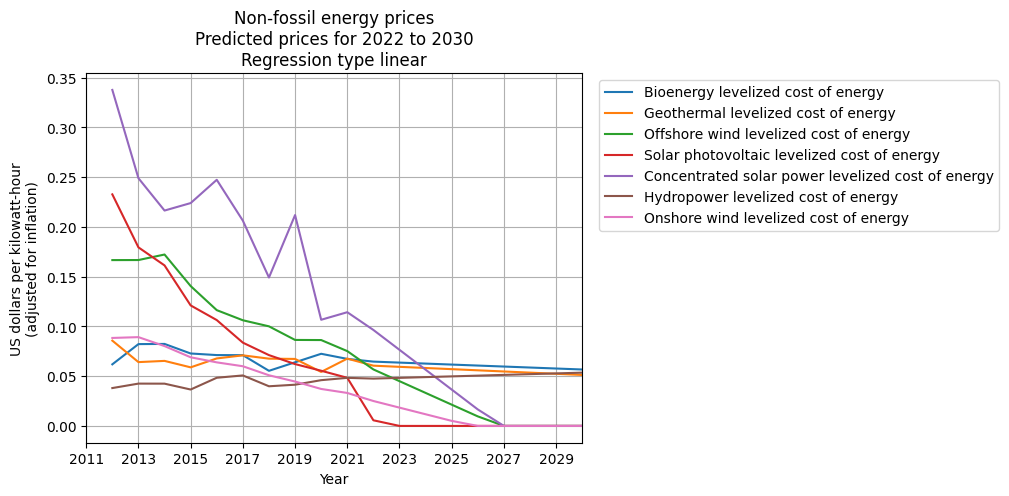

In [11]:
# Call the function with linear regression
regression_model_linear = LinearRegression()
regression_type = "linear"
predict_future_prices(regression_model_linear, 'linear')

Using **linear regression** provides accurate predicted prices for 'Bioenergy levelized cost of energy', 'Geothermal levelized cost of energy', and 'Hydropower levelized cost of energy' (represented by the blue, orange, and brown lines).

However, for 'Concentrated solar power levelized cost of energy', 'Offshore wind levelized cost of energy' and 'Onshore wind levelized cost of energy' (depicted by the purple, green and pink lines), the predicted prices may be somewhat accurate, but there is likely a more effective predictive method available.

The forecasting model applied to 'Solar photovoltaic levelized cost of energy' (indicated by the red line) yields extremely poor predictions.

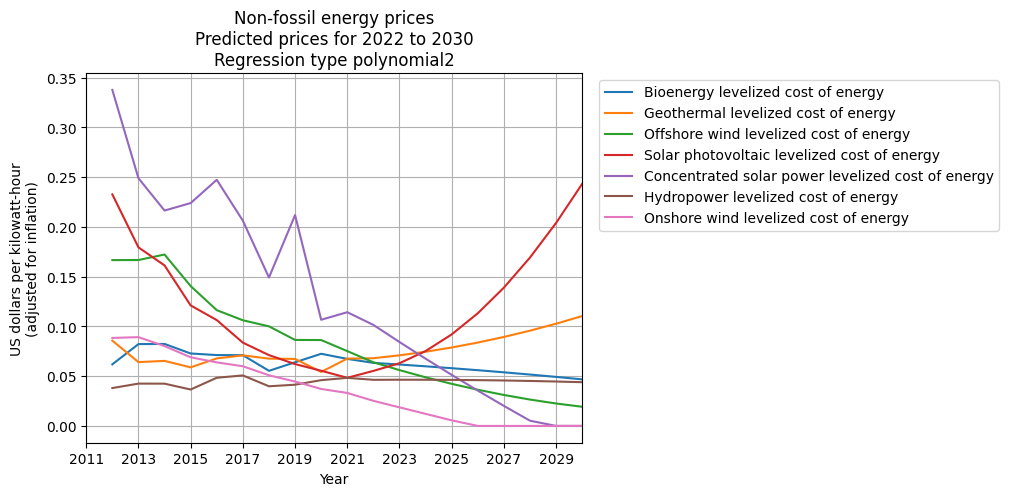

In [12]:
# Call the function with second-degree polynomial regression
regression_model_polynomial2 = LinearRegression()
regression_type = "polynomial2"
predict_future_prices(regression_model_polynomial2, regression_type)

Using **second-degree polynomial regression** provides accurate predicted prices for 'Bioenergy levelized cost of energy', 'Offshore wind levelized cost of energy', and 'Hydropower levelized cost of energy' (represented by the blue, green, and brown lines).

However, for 'Concentrated solar power levelized cost of energy' and  'Onshore wind levelized cost of energy' (depicted by the purple and pink lines), the predicted prices may be somewhat accurate, but there is likely a more effective predictive method available.

The forecasting model applied to 'Solar photovoltaic levelized cost of energy' and 'Geothermal levelized cost of energy' (indicated by the red and orange lines) yields extremely poor predictions.

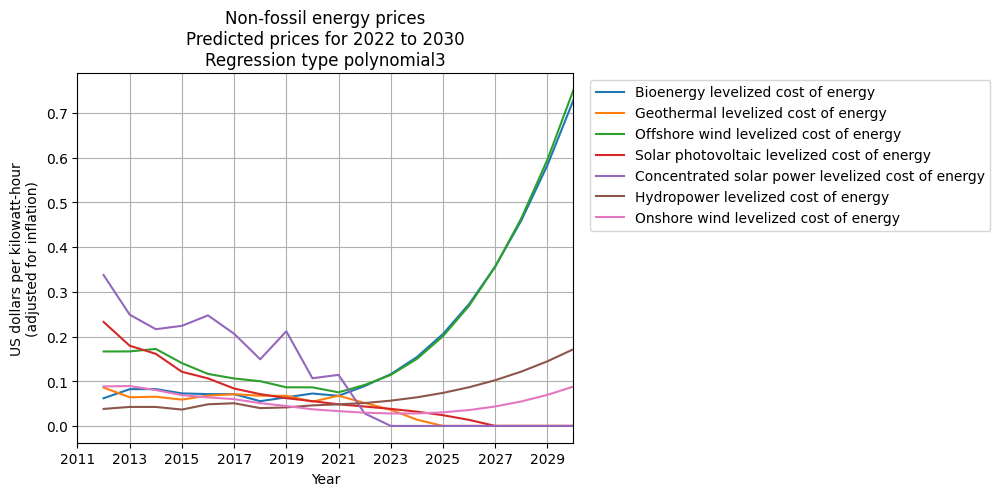

In [13]:
# Call the function with thirth-degree polynomial regression
regression_model_polynomal3 = LinearRegression()
regression_type = "polynomial3"
predict_future_prices(regression_model_polynomal3, regression_type)

Using **third-degree polynomial regression**, the predictions for all of the tested energy sources are found to be unsatisfactory.

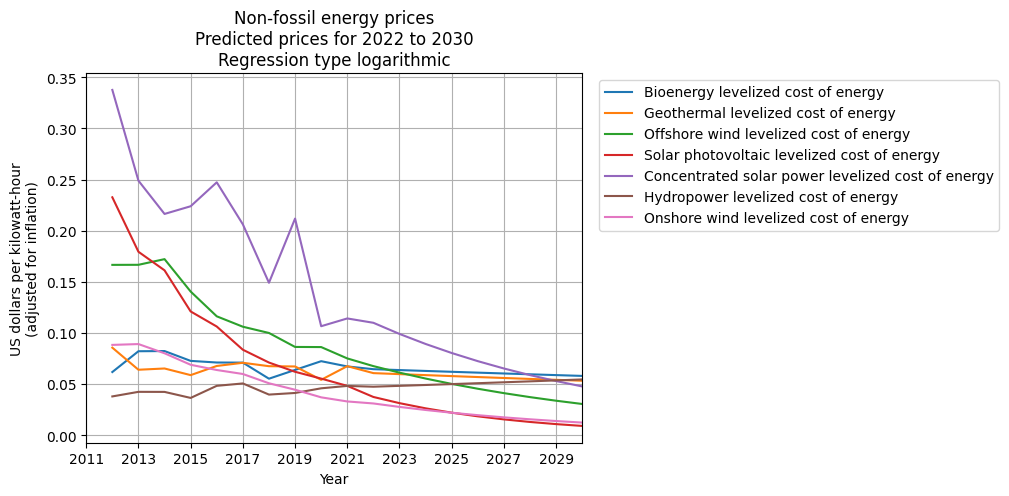

In [14]:
# Call the function with logarithmic regression
regression_model_logarithmic = LinearRegression()
regression_type = "logarithmic"
predict_future_prices(regression_model_logarithmic, regression_type)

Using **logarithmic regression**, accurate predicted prices are obtained for all seven tested energy sources: 'Bioenergy levelized cost of energy', 'Geothermal levelized cost of energy', 'Offshore wind levelized cost of energy', 'Solar photovoltaic levelized cost of energy', 'Concentrated solar power levelized cost of energy', 'Hydropower levelized cost of energy', and 'Onshore wind levelized cost of energy'.

However, for 'Solar photovoltaic levelized cost of energy' (represented by the red line), the predicted price for 2022 exhibits a slight downward deviation, indicating a minor deviation from the expected price.

## **Conclusion**

In this study, we aimed to determine which non-fossil fuel energy technology will have the best price in the future. We utilized available data on the prices of non-fossil energy from 2012 to 2021, obtained from the website "Our World in Data". The prediction of prices for the years 2022 to 2030 was based on this data.

We employed various regression techniques, linear regression, polynomial regression (with degrees 2 and 3), and logarithmic regression. These methods allowed us to analyze the trends in energy prices and make predictions for the future.

Upon visual analysis of the generated plots, it was observed that the logarithmic regression model provided the most accurate predictions (see latest plot). However, it should be noted that even with this model, there was a slight deviation in the plot between the years 2021 and 2022, as indicated by the red line, which represents the 'Solar photovoltaic levelized cost of energy'.

**Among the studied non-fossil energy sources, photovoltaic solar energy and onshore wind energy showed the most promising price trends for the future. These technologies are expected to offer competitive prices compared to other non-fossil fuel energy sources.**

It is important to consider that the accuracy of the predictions is subject to the regression model used and the specific choices made in data analysis. Further research and analysis are recommended to validate these findings and assess additional factors that may impact future energy prices.

## **Reference**

Hannah Ritchie, Max Roser and Pablo Rosado (2022) - "Energy". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/energy' [Online Resource]